# Q1 Online Retail

In [3]:
import warnings  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from ydata_profiling import ProfileReport

# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split # Split the data into test set and train set
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.options.display.float_format = '{:.2f}'.format
sns.set(color_codes=True)
sns.set_style('darkgrid')
%matplotlib inline 

In [2]:
df = pd.read_excel('Q1Online Retail.xlsx')

In [3]:
# pip install ydata-profiling

In [4]:
# !pip install missingno

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Prepraration

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are missing values in "Description" & "CustomerId" columns. 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


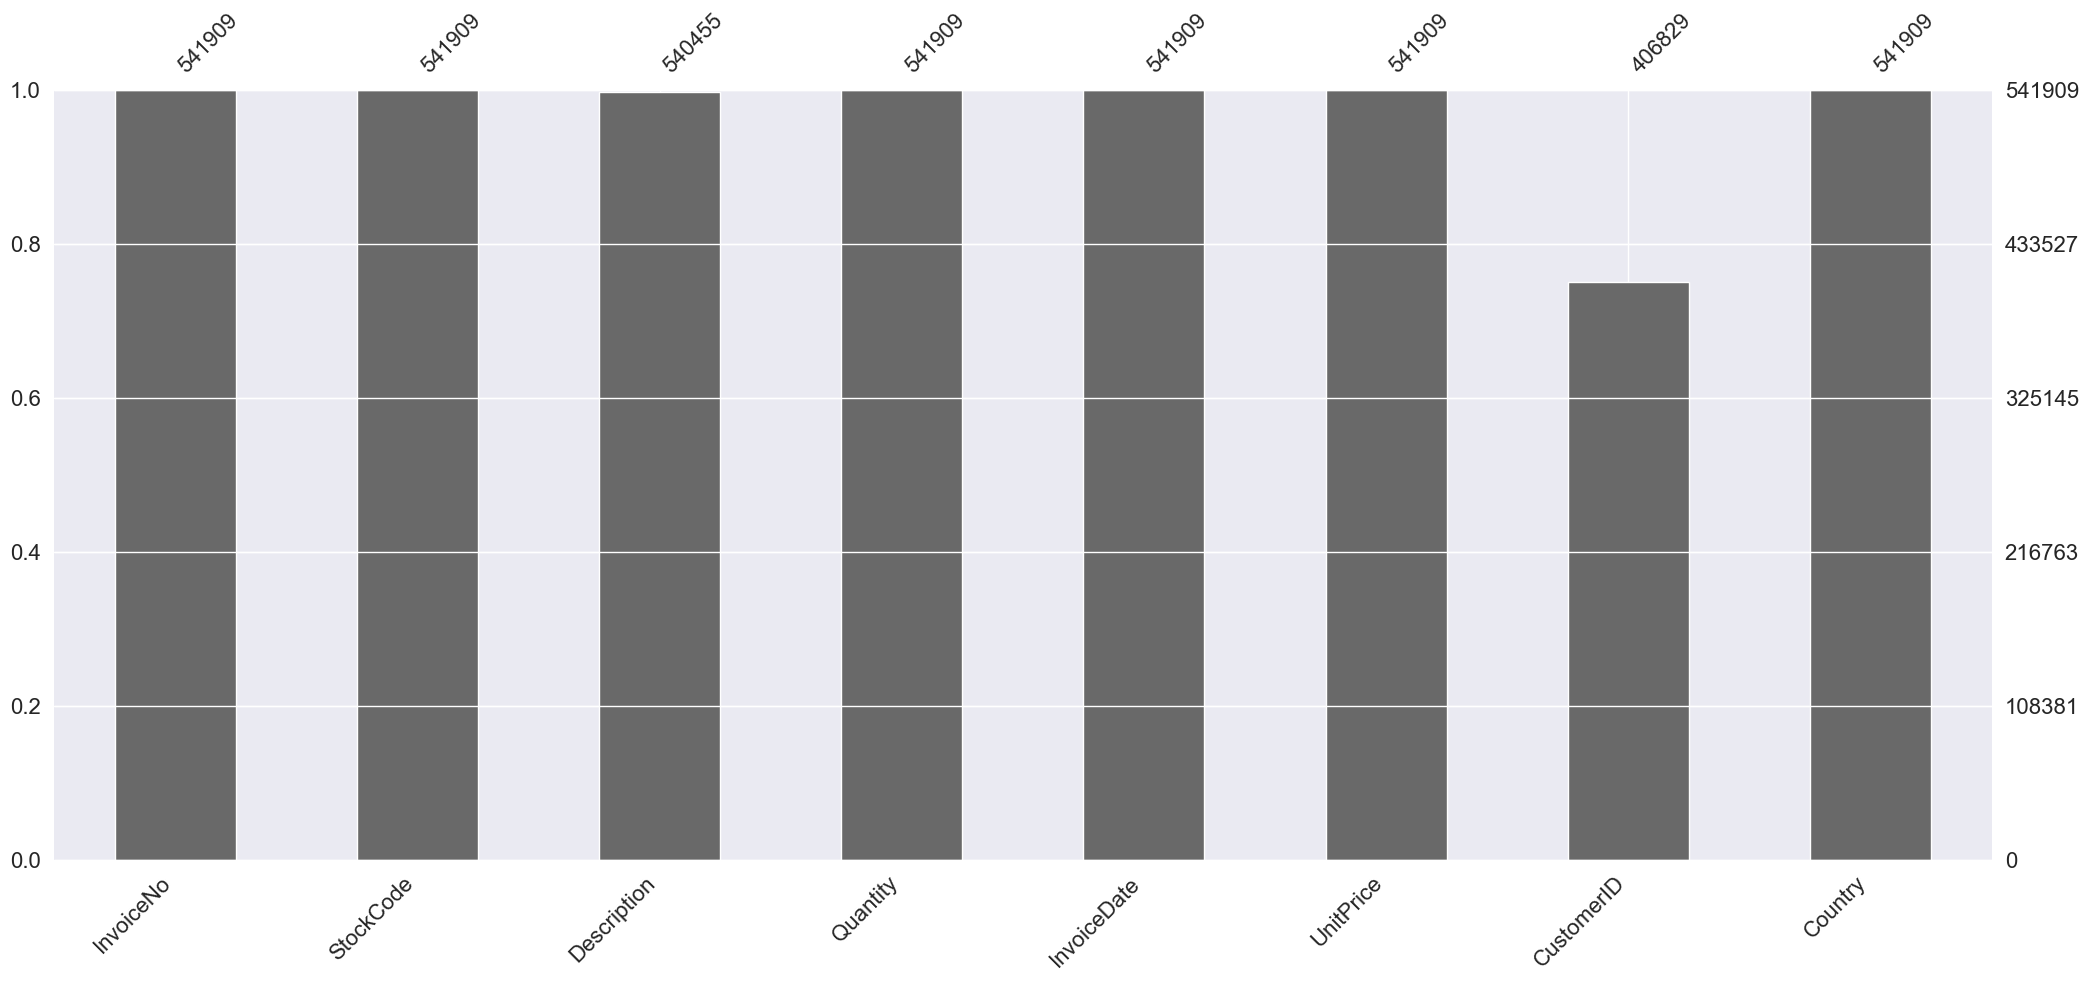

In [7]:
# Checking for missing values

ax = msno.bar(df)

print('There are missing values in "Description" & "CustomerId" columns.','\n')
print(df.isnull().sum())

In [8]:
# Approximately 25% of the data in the CustomerId column is missing. 
# It is not relevant for the analysis

miss_val_cust = (df['CustomerID'].isnull().sum() / len(df['CustomerID'])) * 100
print('"CustomerId" has {:.2f}% missing values'.format(miss_val_cust))

"CustomerId" has 24.93% missing values


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [10]:
print('Total number of observations:', df.shape[0])
before_drop = df.shape[1]
print('Total number of attributes before dropping:', before_drop)

Total number of observations: 541909
Total number of attributes before dropping: 8


In [11]:
print('Columns before dropping:\n\n',df.columns)

Columns before dropping:

 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


#### Dropping irrelevant columns 

In [12]:
# Approximately 25% of the data in the CustomerId column is missing, I will drop this column

df.drop(['CustomerID'], axis=1, inplace=True) 

In [13]:
print('Total number of attributes BEFORE dropping:', before_drop)
print('Total number of attributes AFTER dropping:', df.shape[1])

Total number of attributes BEFORE dropping: 8
Total number of attributes AFTER dropping: 7


In [14]:
print('Columns after dropping:\n\n', df.columns)

Columns after dropping:

 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country'],
      dtype='object')


## Exploratory Data Analysis

##### Unique occurrences of Countries

In [18]:
unique_countries = df['Country'].unique()
count_unique_countries = len(unique_countries)

print(f'Unique occurrences of countries: {count_unique_countries}','\n')
print(unique_countries)

Unique occurrences of countries: 38 

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


### Top 10 Countries with the Most Transactional Activity

In [15]:
top_countries = df['Country'].value_counts().reset_index()
top_countries.columns = ['Country', 'Nº Trasactions']

# Top 10 Country Transactions
top_countries.head(10)

,Country,Nº Trasactions
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


### Top 5 Sales Countries

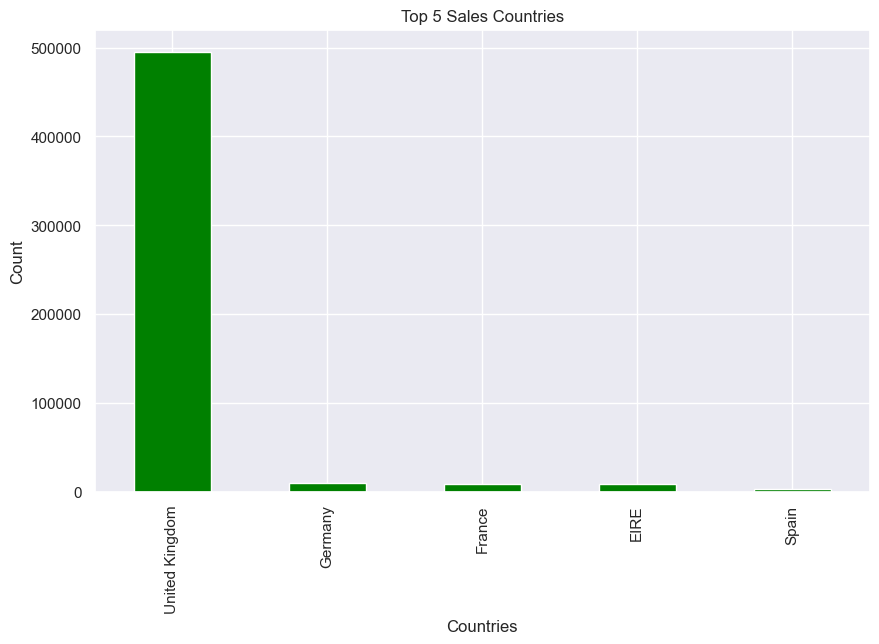

United Kingdom : 495478
Germany : 9495
France : 8557
EIRE : 8196
Spain : 2533


In [19]:
plt.figure(figsize=(10, 6))

top_20_countries = df['Country'].value_counts().head()
top_20_countries.plot(kind='bar', color='green')

plt.title('Top 5 Sales Countries')
plt.ylabel('Count')
plt.xlabel('Countries')

plt.show()

# Top 5 Sales Countries
top5_countries = ['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain']
for country in top5_countries:
    count = df[df['Country'] == country].shape[0]
    print(country,':',count)

### Quantity * Unit Price = Total Amount

In [16]:
# Quantity * Unit Price = Total Amount
df['Total Amount'] = df['Quantity'] * df['UnitPrice']

# New column was added 'Total Amount'
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


### Top 10 Online Retail Spending Countries

In [17]:
total_amount = df['Total Amount'].groupby(df['Country']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()

top10_countries = total_amount.sort_values('Total Amount', ascending=False)

# Top 10 Online Retail Spending Countries
top10_countries.head(10)

,Country,Total Amount
36,United Kingdom,8187806.36
24,Netherlands,284661.54
10,EIRE,263276.82
14,Germany,221698.21
13,France,197403.90
0,Australia,137077.27
33,Switzerland,56385.35
31,Spain,54774.58
3,Belgium,40910.96
32,Sweden,36595.91


##### Unique occurrences of Items


In [20]:
unique_items = df['Description'].unique()
count_unique_items = len(unique_items)

print(f'Unique occurrences of Items: {count_unique_items}')

Unique occurrences of Items: 4224


### Top 50 Best-Selling Items

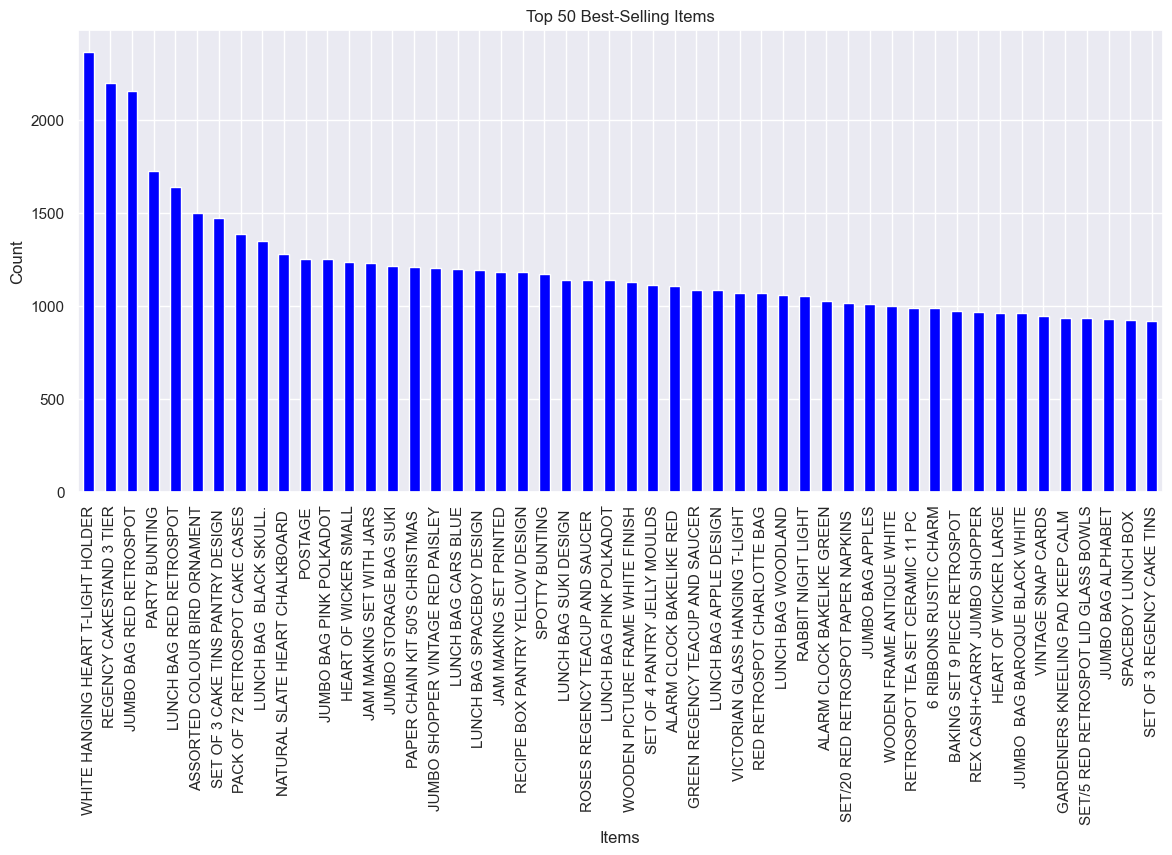

In [21]:
plt.figure(figsize=(14, 6))

top10_products = df['Description'].value_counts().head(50)
top10_products.plot(kind='bar', color='Blue')

plt.title('Top 50 Best-Selling Items')
plt.ylabel('Count')
plt.xlabel('Items');

## K-means Clustering Model

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [23]:
X = df[['Quantity', 'UnitPrice']].values
X

array([[6.  , 2.55],
       [6.  , 3.39],
       [8.  , 2.75],
       ...,
       [4.  , 4.15],
       [4.  , 4.15],
       [3.  , 4.95]])

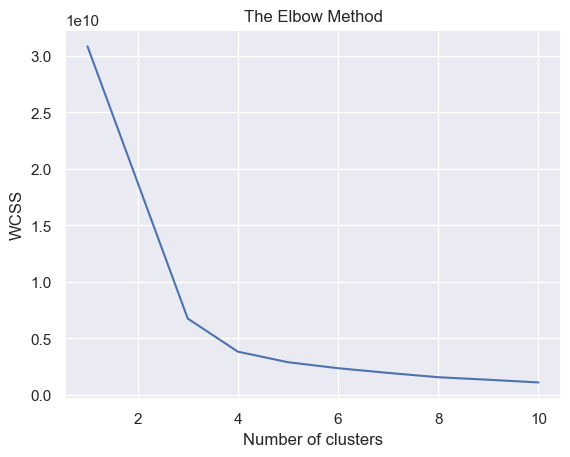

In [24]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# Importing and Fitting K-Means to dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(X)

In [26]:
y

array([0, 0, 0, ..., 0, 0, 0])

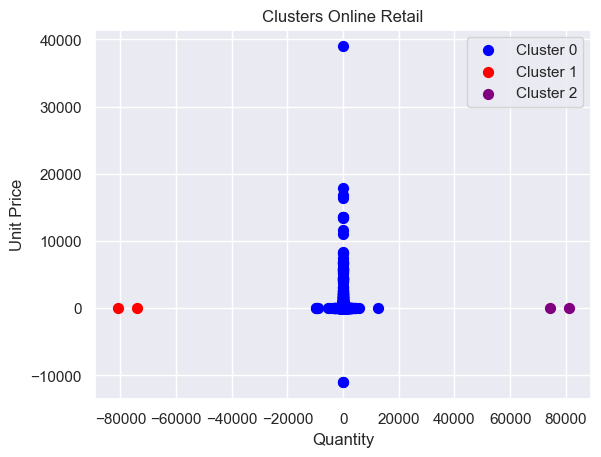

In [27]:
# Plotting results to show the clusters

plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'blue', label = 'Cluster 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'purple', label = 'Cluster 2')


plt.title('Clusters Online Retail')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend()
plt.show() 

# Cluster 0 -----> Medium Quantity - High Unit Price
# Cluster 1 -----> Low Quantity - Low Unit Price
# Cluster 2 -----> High Quantity - Low unit price

In [28]:
df['Type'] = y

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total Amount,Type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,0


### Selecting  predictor variables for Machine Learning

In [66]:
selected_columns = ['Quantity', 'UnitPrice', 'Country', 'Type']
variables_for_ml = df[selected_columns]
variables_for_ml.head()

,Quantity,UnitPrice,Country,Type
0,6,2.55,United Kingdom,0
1,6,3.39,United Kingdom,0
2,8,2.75,United Kingdom,0
3,6,3.39,United Kingdom,0
4,6,3.39,United Kingdom,0


In [67]:
# Separate Predictor Variables and Target Variable 

X1 = variables_for_ml.drop(['Type'], axis=1).values
y1 = variables_for_ml['Type'].values

In [68]:
X1

array([[6, 2.55, 'United Kingdom'],
       [6, 3.39, 'United Kingdom'],
       [8, 2.75, 'United Kingdom'],
       ...,
       [4, 4.15, 'France'],
       [4, 4.15, 'France'],
       [3, 4.95, 'France']], dtype=object)

In [69]:
y1

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
variables_for_ml['Type'].unique()

array([0, 2, 1])

In [70]:
X1.shape, y1.shape

((541909, 3), (541909,))

### Encoding Categorical variable

In [71]:
# We encoded 'Country' variable into numerical variable

label_encoder = LabelEncoder()
variables_for_ml['Country'] = label_encoder.fit_transform(variables_for_ml['Country'])

variables_for_ml.head()

,Quantity,UnitPrice,Country,Type
0,6,2.55,36,0
1,6,3.39,36,0
2,8,2.75,36,0
3,6,3.39,36,0
4,6,3.39,36,0


In [72]:
variables_for_ml['Country'].unique()

array([36, 13,  0, 24, 14, 25, 10, 33, 31, 26, 27, 19,  3, 22, 20, 17,  6,
        9,  7, 32,  1, 18, 12,  2, 15, 16, 30, 21, 35, 29,  8,  5, 37,  4,
       34, 11, 23, 28])

In [78]:
# Separate encoded Predictor Variables and Target Variable 

X_encoded = variables_for_ml.drop(['Type'], axis=1).values
y_encoded = variables_for_ml['Type'].values

In [79]:
X_encoded

array([[ 6.  ,  2.55, 36.  ],
       [ 6.  ,  3.39, 36.  ],
       [ 8.  ,  2.75, 36.  ],
       ...,
       [ 4.  ,  4.15, 13.  ],
       [ 4.  ,  4.15, 13.  ],
       [ 3.  ,  4.95, 13.  ]])

In [83]:
y_encoded

array([0, 0, 0, ..., 0, 0, 0])

## Random Forest Classification

In [80]:
#### Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.25, random_state = 0)

In [81]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X_encoded.shape, y_encoded.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (541909, 3) (541909,)
Number of rows and columns after splitting dataset:  (406431, 3) (135478, 3) (406431,) (135478,)


In [86]:
# Training the Random Forest Classification model on the Training set

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [110]:
# Predicting a new result based on Clusters (Types)

# Quantity	UnitPrice	Country	

#     3         2.50       UK 
#     4         1.80       France   

prediction_1 = classifier.predict([[3, 2.50, 36]])
prediction_2 = classifier.predict([[4, 1.80, 13]])                                 

print('This Customer will be in Cluster:', prediction_1)
print('This Customer will be in Cluster:', prediction_2)

This Customer will be in Cluster: [0]
This Customer will be in Cluster: [0]


In [101]:
# Predicting the Test set results
# Prediciton Vs Reality

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Evaluating the Model Performance

In [114]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm,'\n')

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy RF test: {:.6f}%'.format(accuracy))

[[135477      0]
 [     1      0]] 

Accuracy RF test: 0.999993%


## Decision Tree Classification

In [116]:
# Training the Decision Tree Classification model on the Training set

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [117]:
# Predicting a new result based on Clusters (Types)

# Quantity	UnitPrice	Country	

#     3         2.50       UK 
#     4         1.80       France   

prediction_1 = classifier.predict([[3, 2.50, 36]])
prediction_2 = classifier.predict([[4, 1.80, 13]])                                 

print('This Customer will be in Cluster:', prediction_1)
print('This Customer will be in Cluster:', prediction_2)

This Customer will be in Cluster: [0]
This Customer will be in Cluster: [0]


In [118]:
# Predicting the Test set results
# Prediciton Vs Reality

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Evaluating the Model Performance

In [120]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm,'\n')

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy DT test: {:.6f}%'.format(accuracy))

[[135477      0]
 [     0      1]] 

Accuracy DT test: 1.000000%


## KNN Classification

In [123]:
# Training the KNN Classification model on the Training set

classifier = KNeighborsClassifier (n_neighbors = 5, metric = 'minkowski', p = 2) # p=2 set the distance between my X and y
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [124]:
# Predicting a new result based on Clusters (Types)

# Quantity	UnitPrice	Country	

#     3         2.50       UK 
#     4         1.80       France   

prediction_1 = classifier.predict([[3, 2.50, 36]])
prediction_2 = classifier.predict([[4, 1.80, 13]])                                 

print('This Customer will be in Cluster:', prediction_1)
print('This Customer will be in Cluster:', prediction_2)

This Customer will be in Cluster: [0]
This Customer will be in Cluster: [0]


In [125]:
# Predicting the Test set results
# Prediciton Vs Reality

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Evaluating the Model Performance

In [127]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm,'\n')

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy KNN test: {:.6f}%'.format(accuracy))

[[135477      0]
 [     1      0]] 

Accuracy KNN test: 0.999993%


## Prediction Models Comparison

In [135]:
data = {
    'Prediction Models': ['Cluster'],
    'RF': [0],
    'DT': [0],
    'KNN': [0]}

profit_comparison = pd.DataFrame(data)
profit_comparison.set_index('Prediction Models', inplace=True)
profit_comparison

,RF,DT,KNN
Prediction Models,,,
Cluster,0,0,0


## Collect Models Data

In [1]:
models = ['Random Forest', 'Decision Tree', 'KNN']

scores = [0.999993, 1.000000, 0.999993] 

## Classification Models Comparison

In [4]:
models_comparison = pd.DataFrame()

models_comparison['Test Score'] = scores
models_comparison.index = models
models_comparison

,Test Score
Random Forest,1.00
Decision Tree,1.00
KNN,1.00


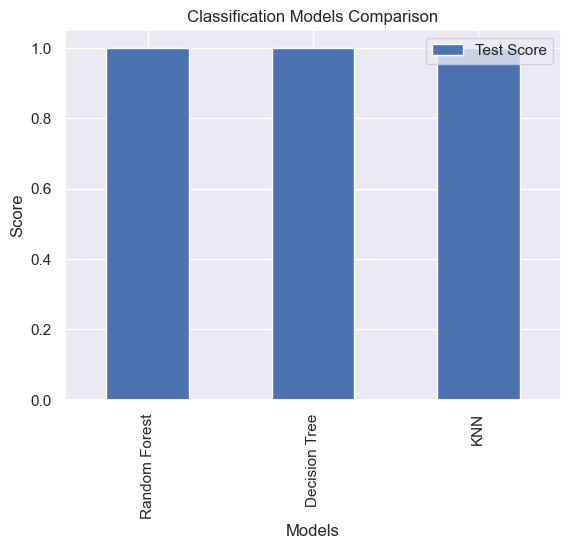

In [5]:
models_comparison.plot(kind='bar')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Classification Models Comparison');